In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

###  Régression linéaire multiple


In [2]:
dataset = pd.read_csv('Advertising.csv')

In [102]:
x = dataset[['TV', 'Radio', 'Newspaper']].values
y = dataset[['Sales']].values

In [103]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [104]:
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

In [105]:
# Verification des dimensions
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160, 1)
(40, 1)


In [109]:
# Initialisation du vecteur theta aléatoire, avec 4 éléments (car X a quatre colonnes)
theta = np.random.randn(4, 1)
theta

array([[0.14404357],
       [1.45427351],
       [0.76103773],
       [0.12167502]])

In [110]:
def model(X, theta):
    return X.dot(theta)

In [111]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [112]:
cost_function(X_train, y_train, theta)

144.44479513496213

In [113]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [114]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [115]:
n_iterations = 10000
learning_rate = 0.02

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)


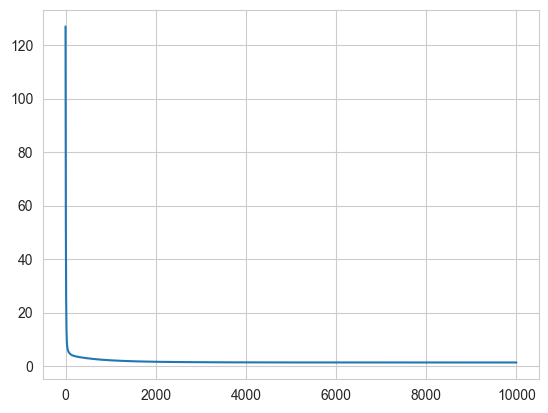

In [116]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [117]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [120]:
predictions_train = model(X_train, theta_final)
coef_determination_regression_multiple_train = coef_determination(y_train, predictions_train)
coef_determination_regression_multiple_train

0.9001328507244148

In [121]:
predictions_test = model(X_test, theta_final)
coef_determination_regression_multiple_test= coef_determination(y_test, predictions_test)
coef_determination_regression_multiple_test

0.8825672111439224

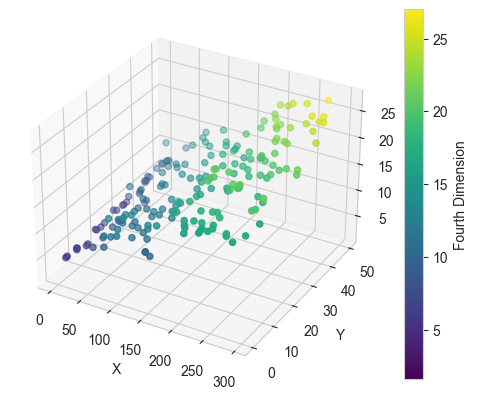

In [122]:
from mpl_toolkits.mplot3d import Axes3D

# Generate sample 4D data
x = dataset["TV"]
y = dataset["Radio"]
z = dataset["Newspaper"]
w = dataset["Sales"]  # Fourth dimension

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Represent the fourth dimension using color
sc = ax.scatter(x, y, w, c=w, cmap='viridis')
plt.colorbar(sc, label='Fourth Dimension')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

###  Régression polynômiale multivariée


In [142]:
dataset = pd.read_csv('Advertising.csv')

In [143]:
x = dataset[['TV', 'Radio', 'Newspaper']].values
y = dataset[['Sales']].values

In [144]:
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [145]:
X = np.hstack((x, x[:, 0:1]**2, x[:, 1:2]**2, x[:, 2:3]**2, x[:, 0:1]*x[:, 1:2], x[:, 0:1]*x[:, 2:3], x[:, 1:2]*x[:, 2:3]))

print(X.shape)


(200, 9)


In [146]:
print(X[:10])

[[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 1.428840e+03
  4.788640e+03 8.697780e+03 1.592292e+04 2.615760e+03]
 [4.450000e+01 3.930000e+01 4.510000e+01 1.980250e+03 1.544490e+03
  2.034010e+03 1.748850e+03 2.006950e+03 1.772430e+03]
 [1.720000e+01 4.590000e+01 6.930000e+01 2.958400e+02 2.106810e+03
  4.802490e+03 7.894800e+02 1.191960e+03 3.180870e+03]
 [1.515000e+02 4.130000e+01 5.850000e+01 2.295225e+04 1.705690e+03
  3.422250e+03 6.256950e+03 8.862750e+03 2.416050e+03]
 [1.808000e+02 1.080000e+01 5.840000e+01 3.268864e+04 1.166400e+02
  3.410560e+03 1.952640e+03 1.055872e+04 6.307200e+02]
 [8.700000e+00 4.890000e+01 7.500000e+01 7.569000e+01 2.391210e+03
  5.625000e+03 4.254300e+02 6.525000e+02 3.667500e+03]
 [5.750000e+01 3.280000e+01 2.350000e+01 3.306250e+03 1.075840e+03
  5.522500e+02 1.886000e+03 1.351250e+03 7.708000e+02]
 [1.202000e+02 1.960000e+01 1.160000e+01 1.444804e+04 3.841600e+02
  1.345600e+02 2.355920e+03 1.394320e+03 2.273600e+02]
 [8.600000e+00 2.100000e

In [147]:
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

In [148]:
y.shape

(200, 1)

In [149]:
y = y.reshape(-1,1)
y.shape

(200, 1)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()


X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

In [151]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 10)
(40, 10)
(160, 1)
(40, 1)


In [152]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(10,1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]]


In [153]:
def model(X, theta):
    return np.dot(X, theta)
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [154]:
cost_function(X_train, y_train, theta)

74.28430598427326

In [155]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [156]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [157]:
# Entrainement du modèle
n_iterations = 100000
learning_rate = 0.03

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [158]:
theta_final

array([[ 4.4465345 ],
       [-3.78508781],
       [-3.1127696 ],
       [ 1.2591307 ],
       [ 2.39339719],
       [-4.7722922 ],
       [ 8.16249797],
       [ 2.16939454],
       [-0.1364194 ],
       [12.00634555]])

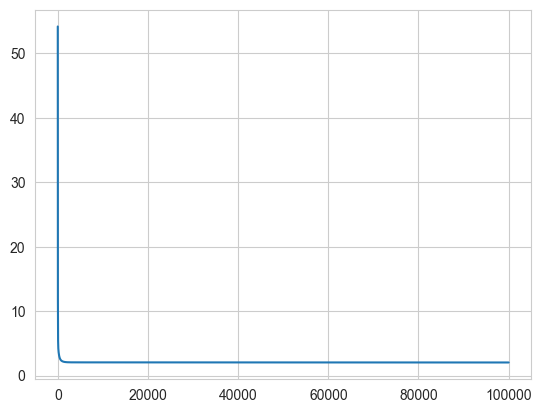

In [159]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [160]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [161]:
predictions_train = model(X_train, theta_final)
coef_determination_regression_polynomiale_train = coef_determination(y_train, predictions_train)
coef_determination_regression_polynomiale_train

0.8482775908918861

In [162]:
predictions_test = model(X_test, theta_final)
coef_determination_regression_polynomiale_test = coef_determination(y_test, predictions_test)
coef_determination_regression_polynomiale_test

0.8367438172542914

In [170]:
from tabulate import tabulate

data = [
    ["regression_multiple_train", coef_determination_regression_multiple_train],
    ["regression_multiple_test", coef_determination_regression_multiple_test],
    ["regression_polynomiale_train", coef_determination_regression_polynomiale_train],
    ["regression_polynomiale_test", coef_determination_regression_polynomiale_test]
]
headers = ["Modele", "CF"]

print(tabulate(data, headers=headers, tablefmt="pretty"))

+------------------------------+--------------------+
|            Modele            |         CF         |
+------------------------------+--------------------+
|  regression_multiple_train   | 0.9001328507244148 |
|   regression_multiple_test   | 0.8825672111439224 |
| regression_polynomiale_train | 0.8482775908918861 |
| regression_polynomiale_test  | 0.8367438172542914 |
+------------------------------+--------------------+
